# **Lab 6 - Approssimazione numerica di derivate**

 <mark>**Formule alle differenze finite (approssimazione di derivate)**</mark></br>
Data una funzione $f$ ed un punto $x_{0}$, la sua derivata nel punto $x_0$ si può approssimare attraverso le seguenti formule:</br></br>

- $f'(x_{0})\approx \frac{1}{h}\left[f(x_{0}+h)-f(x_{0})\right]\quad\quad\quad\quad$ (differenza in avanti)
</br></br>
- $f'(x_{0})\approx \frac{1}{h}\left[f(x_{0})-f(x_{0}-h)\right]\quad\quad\quad\quad$ (differenza all'indietro)
</br></br>
- $f'(x_{0})\approx \frac{1}{2h}\left[f(x_{0}+h)-f(x_{0}-h)\right]\quad\quad$ (differenza centrata)

</br>

dove $h>0$ è il cosìdetto *passo*.

 <mark>**Esercizio 1**</mark></br>
Sia $f(x)=e^{-x}$. Si calcoli -a mano- il valore della derivata di $f$ nel punto $x_0=0.25$, quindi lo si confronti con la sua approssimazione alle differenze finite per $h=0.05$. In particolare, si calcoli l'errore ottenuto con tre metodi, evidenziando quello che restituisce la miglior approssimazione.

In [1]:
import numpy as np

x0 = 0.25

f = lambda x: np.exp(-x)
df = lambda x: -np.exp(-x)

dfEx = df(x0)

h = 0.05
dfIndietro = (f(x0)-f(x0-h))/h
dfAvanti   = (f(x0+h)-f(x0))/h
dfCentrata = (f(x0+h)-f(x0-h))/(2*h)

print("Errori approssimazione derivata\n" + "-"*31)
print("Indietro\t%.4e" % abs(dfEx-dfIndietro))
print("Avanti\t\t%.4e" % abs(dfEx-dfAvanti))
print("Centrata\t%.4e" % abs(dfEx-dfCentrata))

Errori approssimazione derivata
-------------------------------
Indietro	1.9799e-02
Avanti		1.9150e-02
Centrata	3.2454e-04


<mark>**Esercizio 2**</mark></br>
Ripetere l'analisi proposta all'Es. 1 facendo variare l'ampiezza del passo $h$. In particolare, si consideri

$$ h\in\{ 0.2,0.1,0.05,0.025,0.0125 \}. $$

Verificare graficamente l'ordine di convergenza delle singole formule come previsto dalla teoria (per farlo, utilizzare un opportuno grafico in scala logaritmica).

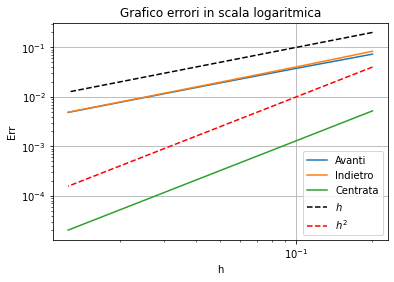

In [2]:
import matplotlib.pyplot as plt

dfErrori = {'Avanti':[], 'Indietro':[], 'Centrata':[]}

hlist = np.array([0.2,0.1,0.05,0.025,0.0125])

for h in hlist:
  dfIndietro = (f(x0)-f(x0-h))/h
  dfAvanti   = (f(x0+h)-f(x0))/h
  dfCentrata = (f(x0+h)-f(x0-h))/(2*h)

  dfErrori['Indietro'].append(abs(dfEx - dfIndietro))
  dfErrori['Avanti'].append(abs(dfEx - dfAvanti))
  dfErrori['Centrata'].append(abs(dfEx - dfCentrata))


plt.figure(figsize = (6, 4))
for metodo in dfErrori.keys():
  plt.loglog(hlist, dfErrori[metodo], label = metodo)
plt.loglog(hlist, hlist,'k--', label = '$h$')
plt.loglog(hlist, hlist**2,'r--', label = '$h^2$')
plt.legend()
plt.title('Grafico errori in scala logaritmica')
plt.xlabel('h')
plt.ylabel('Err')
plt.grid()
plt.show()


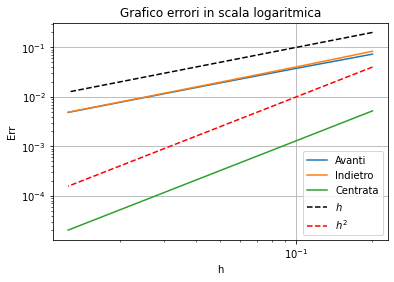

In [3]:
#soluzione con un metodo più semplice

dfErroriAvanti = []
dfErroriIndietro = []
dfErroriCentrata = []

hlist = np.array([0.2,0.1,0.05,0.025,0.0125])

for h in hlist:
  dfIndietro = (f(x0)-f(x0-h))/h
  dfAvanti   = (f(x0+h)-f(x0))/h
  dfCentrata = (f(x0+h)-f(x0-h))/(2*h)

  dfErroriIndietro.append(abs(dfEx - dfIndietro))
  dfErroriAvanti.append(abs(dfEx - dfAvanti))
  dfErroriCentrata.append(abs(dfEx - dfCentrata))


plt.figure(figsize = (6, 4))
plt.loglog(hlist, dfErroriAvanti, label = 'Avanti')
plt.loglog(hlist, dfErroriIndietro, label = 'Indietro')
plt.loglog(hlist, dfErroriCentrata, label = 'Centrata')

plt.loglog(hlist, hlist,'k--', label = '$h$')
plt.loglog(hlist, hlist**2,'r--', label = '$h^2$')
plt.legend()
plt.title('Grafico errori in scala logaritmica')
plt.xlabel('h')
plt.ylabel('Err')
plt.grid()
plt.show()


**Commento** (Perché usare una scala logaritmica?)

Il motivo di questa scelta è legato alla forma in cui si presentano le stime dell'errore viste a teoria. Infatti, dalla teoria sappiamo che l'errore delle formule alle differenze finite è della forma:

$$|f'(x_{0})-(D_{h}f)(x_0)|=Ch^p,$$

dove $h$ è il passo di discretizzazione della formula, $D_{h}f$ è la discretizzazione alle differenzie finite (in avanti, all'indietro o centrate), mentre $C$ è una costante indpendente da $h$. Applicando il logaritmo ad ambo i membri dell'uguaglianza, possiamo riscrivere la stima come

$$\log{|f'(x_{0})-(D_{h}f)(x_0)|}= \log{C}+p\log{h}.$$

Ne deduciamo quindi che, il logaritmo dell'errore dipende dal logaritmo del passo in maniera affine. In particolare, il grafico del logaritmo dell'errore, inteso come funzione di $\log{h}$, è costituito da una retta con intercetta $\log{C}$ e pendenza $p$. Questo ci dice che per confrontare agevolmente gli ordini di convergenza delle diverse formule è sufficiente confrontare le pendenze delle rette che si ottengono in un grafico a scala logaritmica (su entrambi gli assi).

**Commento** (Dizionari in Python)

La soluzione proposta fa uso dei cosìdetti *dizionari*, oggetti simili alle liste ma che si distinguono per l'utilizzo di etichette (dette *chiavi*), al posto dei classici indici posizionali. Ovviamente, non è necessario utilizzare i dizionari per risolvere l'esercizio, si tratta solo di una piccola aggiunta volta ad espandere la vostra conoscenza del linguaggio.

La chiamata

    carrello = {'banane':5, 'mele':4, 'pere':8}

definisce un dizionario, le cui *chiavi* sono le stringhe 'banane', 'mele' e 'pere'. Queste etichette, si possono utilizzare per accedere agli elementi corrispondenti. Per esempio,

    carrello['banane']

restituisce 5, che è il valore corrispondente. In generale, il contenuto di un dizionario può essere qualsiasi: qui, gli elementi sono numeri interi, nell'esercizio, invece, gli elementi sono liste (liste di errori, una per ogni metodo).

L'elenco delle chiavi in un dizionario si può estrarre con il metodo ".keys()"

    carrello.keys()

che qui restituisce un iterabile (sostanzialmente una lista) contenente 'banane', 'mele' e 'pere'.

<mark>**Esercizio 3**</mark></br>
Si consideri ora una partizione uniforme dell'intervallo $[1,3]$ e si immagini di approssimare la derivata prima di $f$ in ciascun punto della partizione, secondo le formule proposte sopra. Cosa si può dire delle tre diverse formule per l'approssimazione della derivata negli estremi dell'intervallo?

**Soluzione**

Con le differenze finite in avanti non si può calcolare il valore approssimato della derivata nell'estremo destro dell'intervallo, mentre con le differenze finite all'indietro non si può calcolare il valore della derivata nell'estremo sinistro. Per quanto riguarda invece le differenze finite centrate, non si possono calcolare entrambi i valori.

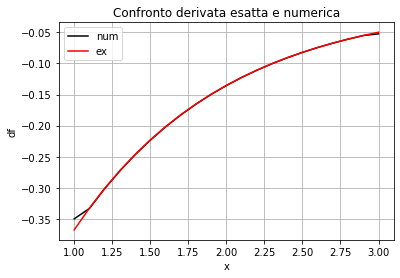

In [24]:
dfn = []
N=20
x = np.linspace(1,3,N+1)
h = x[1]-x[0]

dfn.append((f(x[1])-f(x[0]))/h)

for i in range(1,N):
    dfn.append((f(x[i+1])-f(x[i-1]))/(2*h))

dfn.append((f(x[N])-f(x[N-1]))/h)

plt.figure(figsize = (6, 4))
plt.plot(x, dfn,'k', label = 'num')
plt.plot(x, df(x),'r', label = 'ex')
plt.legend()
plt.title('Confronto derivata esatta e numerica')
plt.xlabel('x')
plt.ylabel('df')
plt.grid()
plt.show()

# Esercizi per casa

<mark>**Esercizio 4**</mark></br>
Ripetere l'analisi proposta all'Es. 4, ma avendo posto $f(x)=4(x-0.25)|x-0.25|$, sapendo che tale funzione è derivabile in $x_{0}=0.25$, e che $f'(x_0)=0.0$. Cosa si osserva? Perché?

In [ ]:
import matplotlib.pyplot as plt

f = lambda x: 4*(x-0.25)*abs(x-0.25)
dfEx = 0.0

dfErrori = {'Avanti':[], 'Indietro':[], 'Centrata':[]}

hlist = np.array([0.2,0.1,0.05,0.025,0.0125])

for h in hlist:
  dfIndietro = (f(x0)-f(x0-h))/h
  dfAvanti   = (f(x0+h)-f(x0))/h
  dfCentrata = (f(x0+h)-f(x0-h))/(2*h)

  dfErrori['Indietro'].append(abs(dfEx - dfIndietro))
  dfErrori['Avanti'].append(abs(dfEx - dfAvanti))
  dfErrori['Centrata'].append(abs(dfEx - dfCentrata))


plt.figure(figsize = (6, 4))
for metodo in dfErrori.keys():
  plt.loglog(hlist, dfErrori[metodo], label = metodo)
plt.loglog(hlist, hlist,'k--', label = '$h$')
plt.loglog(hlist, hlist**2,'r--', label = '$h^2$')
plt.legend()
plt.title('Grafico errori in scala logaritmica')
plt.xlabel('h')
plt.ylabel('Err')
plt.grid()
plt.show()

**Commento**

Questa volta, tutti metodi presentano ordine 1. Come mai? Perché la teoria prevede un determinato ordine di convergenza, solo se la funzione è abbastanza regolare. In particolare, affinché il metodo alle differenze finite centrate sia di ordine 2, $f$ deve essere almeno di classe $\mathcal{C}^{2}$ (nella dimostrazione, si usa lo sviluppo di Taylor!). La funzione dell'esercizio, invece, è sì derivabile, ma la sua derivata seconda è discontinua.